## Tobigs 5주차 Crawling 과제
- Selenium을 활용하여 학술연구정보서비스 RISS에서 주어진 키워드에 대한 **학위 논문**을 검색 후 **첫번째 페이지**에 존재하는 논문의 **URL**을 먼저 수집합니다. 
- 수집한 URL을 기반으로 접근하여 논문 정보 **1) 저자 2) 발행년도 3) 제목 4) 부가정보의 첫번째 항목**을 수집해주세요! 
- 주석을 읽고 주어진 코드 중간에 있는 ???와 공란을 채워주시면 됩니다!

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd

In [2]:
keyword='코로나'  #검색용 키워드
paper=[]  #결과 저장용 리스트

#### 1. 드라이버 오픈 및 Riss로 이동

In [3]:
driver = webdriver.Chrome('C:/Users/dpfla/Downloads/chromedriver_win32/chromedriver.exe')  #드라이버 오픈
driver.get('http://www.riss.kr/index.do')   #riss로 이동

#### 2. 검색창에 접근하여 검색용 키워드 입력 및 검색

In [4]:
driver.find_element_by_id('query').send_keys(keyword)  # 검색창 접근 및 키워드 입력
driver.find_element_by_id('query').submit()   # 검색창에 검색용 키워드 검색

#### 3. 검색 화면 창에서 학위 논문 창으로 이동
![image](https://user-images.githubusercontent.com/69336270/129825390-d270bcca-003c-46f4-8bfd-14e4f1ed3f87.png)
  
    방법 1. 상단의 학위 논문 탭 클릭  
    방법 2. 검색 화면 창에서 학위논문 결과 옆 더보기 버튼 클릭

In [5]:
driver.find_element_by_xpath('//*[@id="tabMenu"]/div/ul/li[3]/a').send_keys(Keys.ENTER) 

#### 4. 주어진 키워드로 검색했을 때 학위 논문의 전체 수 구하기

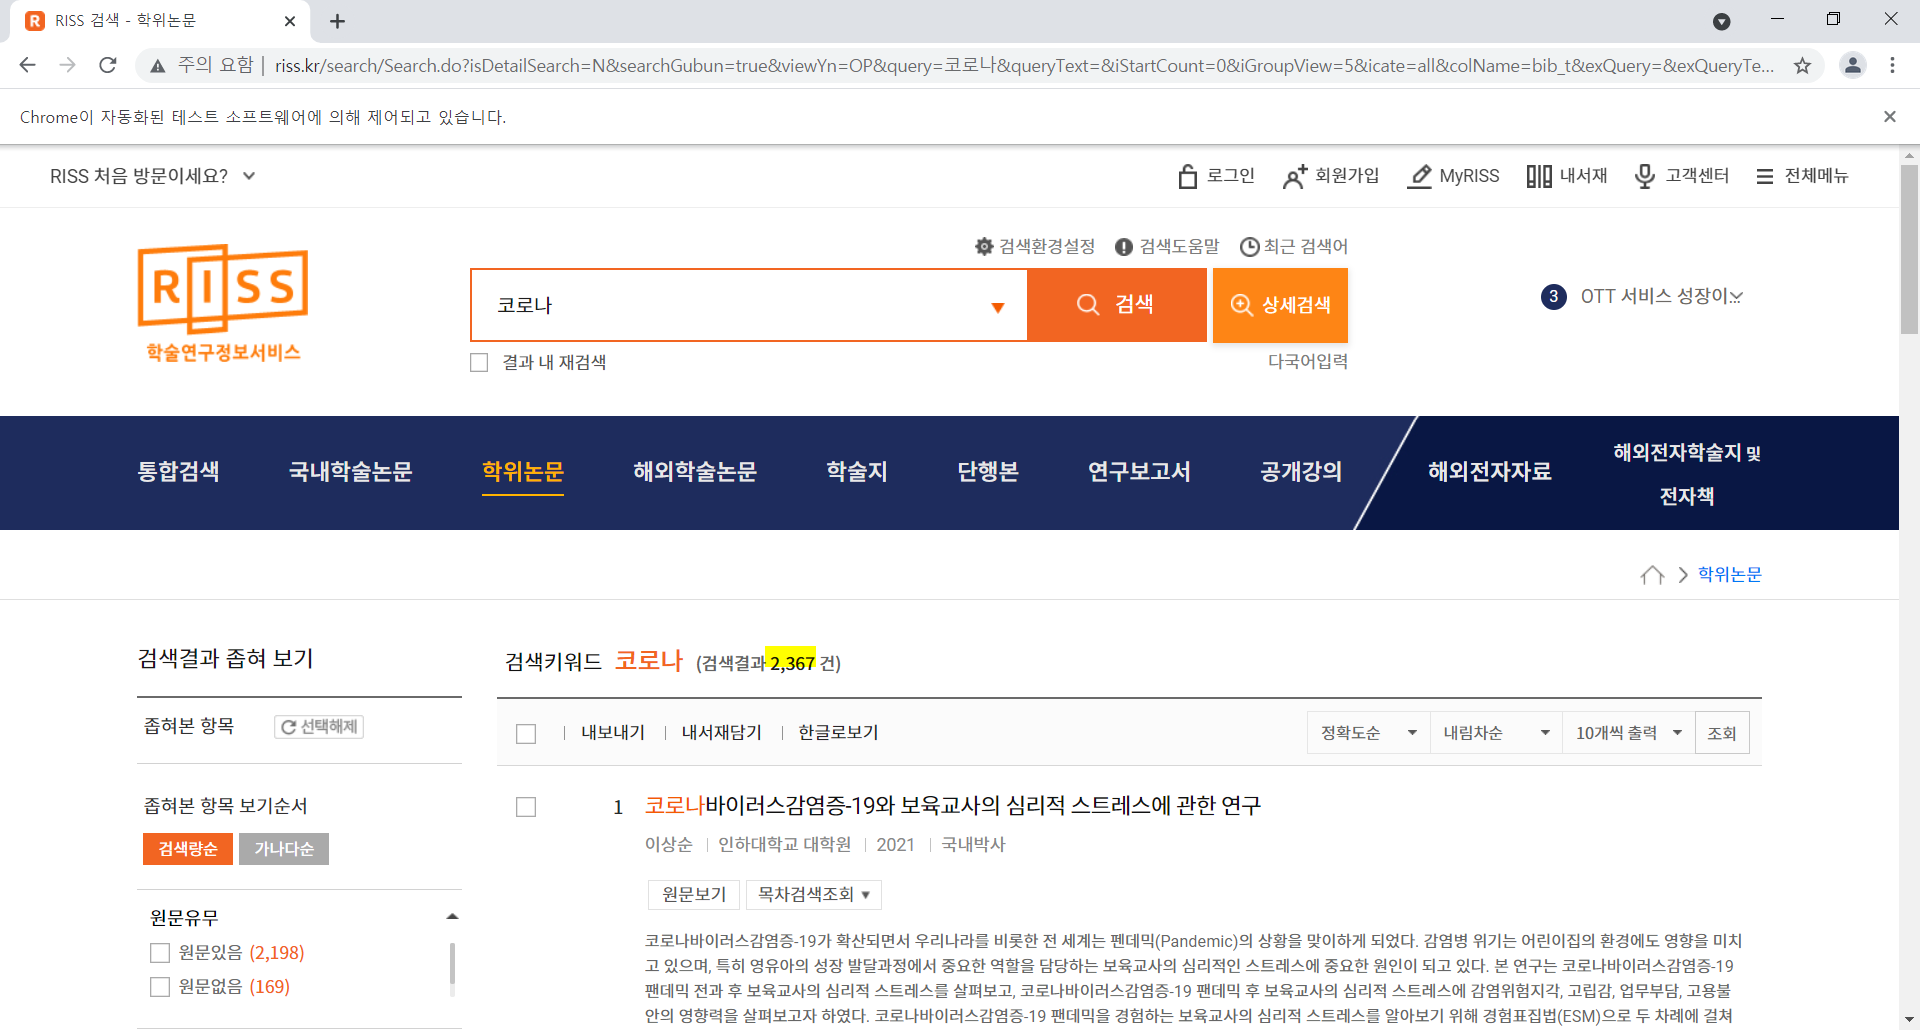

In [6]:
total = driver.find_element_by_xpath('//*[@id="divContent"]/div[2]/div/div[1]/dl/dd/span/span').text  # 전체 논문 수
print(total)
total = int(total.replace(',', ''))     # replace 메서드로 특수문자(,) 제거 후 int형으로 변환
print(total)

2,367
2367


#### 5. 첫페이지에 존재하는 논문의 상세정보 url 수집

In [7]:
urls = []

if total < 10:
    # 주어진 키워드로 검색 시 전체 논문 수가 10개 미만인 경우 - 논문 첫 페이지의 논문 수 = 전체 논문 수
    for i in range(1, total+1):  
        page = '/html/body/div[1]/div[2]/div[4]/div[2]/div/div[3]/div[2]/ul/li['+str(i)+']/div[2]/p[1]/a'
        url = driver.find_element_by_xpath(page).get_attribute('href')
        urls.append(url)
        print(url)
else:
    # 주어진 키워드로 검색 시 전체 논문 수가 10개 이상인 경우 - 논문 첫 페이지의 논문 수 = 10개
    for i in range(1, 11):
        page = '/html/body/div[1]/div[2]/div[4]/div[2]/div/div[3]/div[2]/ul/li['+str(i)+']/div[2]/p[1]/a'
        url = driver.find_element_by_xpath(page).get_attribute('href')
        urls.append(url)
        print(url)

http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=07a507d34dcc4aabffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=eb289c1983bcc4d8ffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=01a2a13eadae0a77ffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=6d78e895b5d9eaf8ffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=e8feb59935e077b7ffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=2437b7913cc2d912ffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=9d66e341766dd66cffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=e155408b36263c5cffe0bdc3ef48d419
http://www.riss.kr/search/detail/DetailView.do?p

#### 6-1. 저자 정보 구하기 예제
수집한 url 중 첫번째 링크의 저자 정보를 구해보자!

In [8]:
data = []  # 수집한 정보 저장용 리스트
driver.get(urls[0])   # 첫번째 링크로 이동

In [9]:
author = driver.find_element_by_xpath('//*[@id="thesisInfoDiv"]/div[2]/div[1]/ul/li[1]/div/p/a').text
data.append(author)
print(author)

이상순


#### 6-2. 연도 정보 구하기 예제
수집한 url 중 첫번째 링크의 연도 정보를 구해보자!

In [10]:
year = driver.find_element_by_xpath('//*[@id="thesisInfoDiv"]/div[2]/div[1]/ul/li[4]/div/p').text
data.append(year)
print(year)

2021


#### 6-3. 제목 정보 구하기 예제
수집한 url 중 첫번째 링크의 제목 정보를 구해보자!

In [11]:
title = driver.find_element_by_xpath('//*[@id="thesisInfoDiv"]/div[1]/h3').text
data.append(title)
print(title)

코로나바이러스감염증-19와 보육교사의 심리적 스트레스에 관한 연구 = A Study on COVID-19 and Psychological Stress of Child Care Teachers


#### 6-4. 부가정보 정보 구하기 예제
수집한 url 중 첫번째 링크의 부가정보 정보를 구해보자!

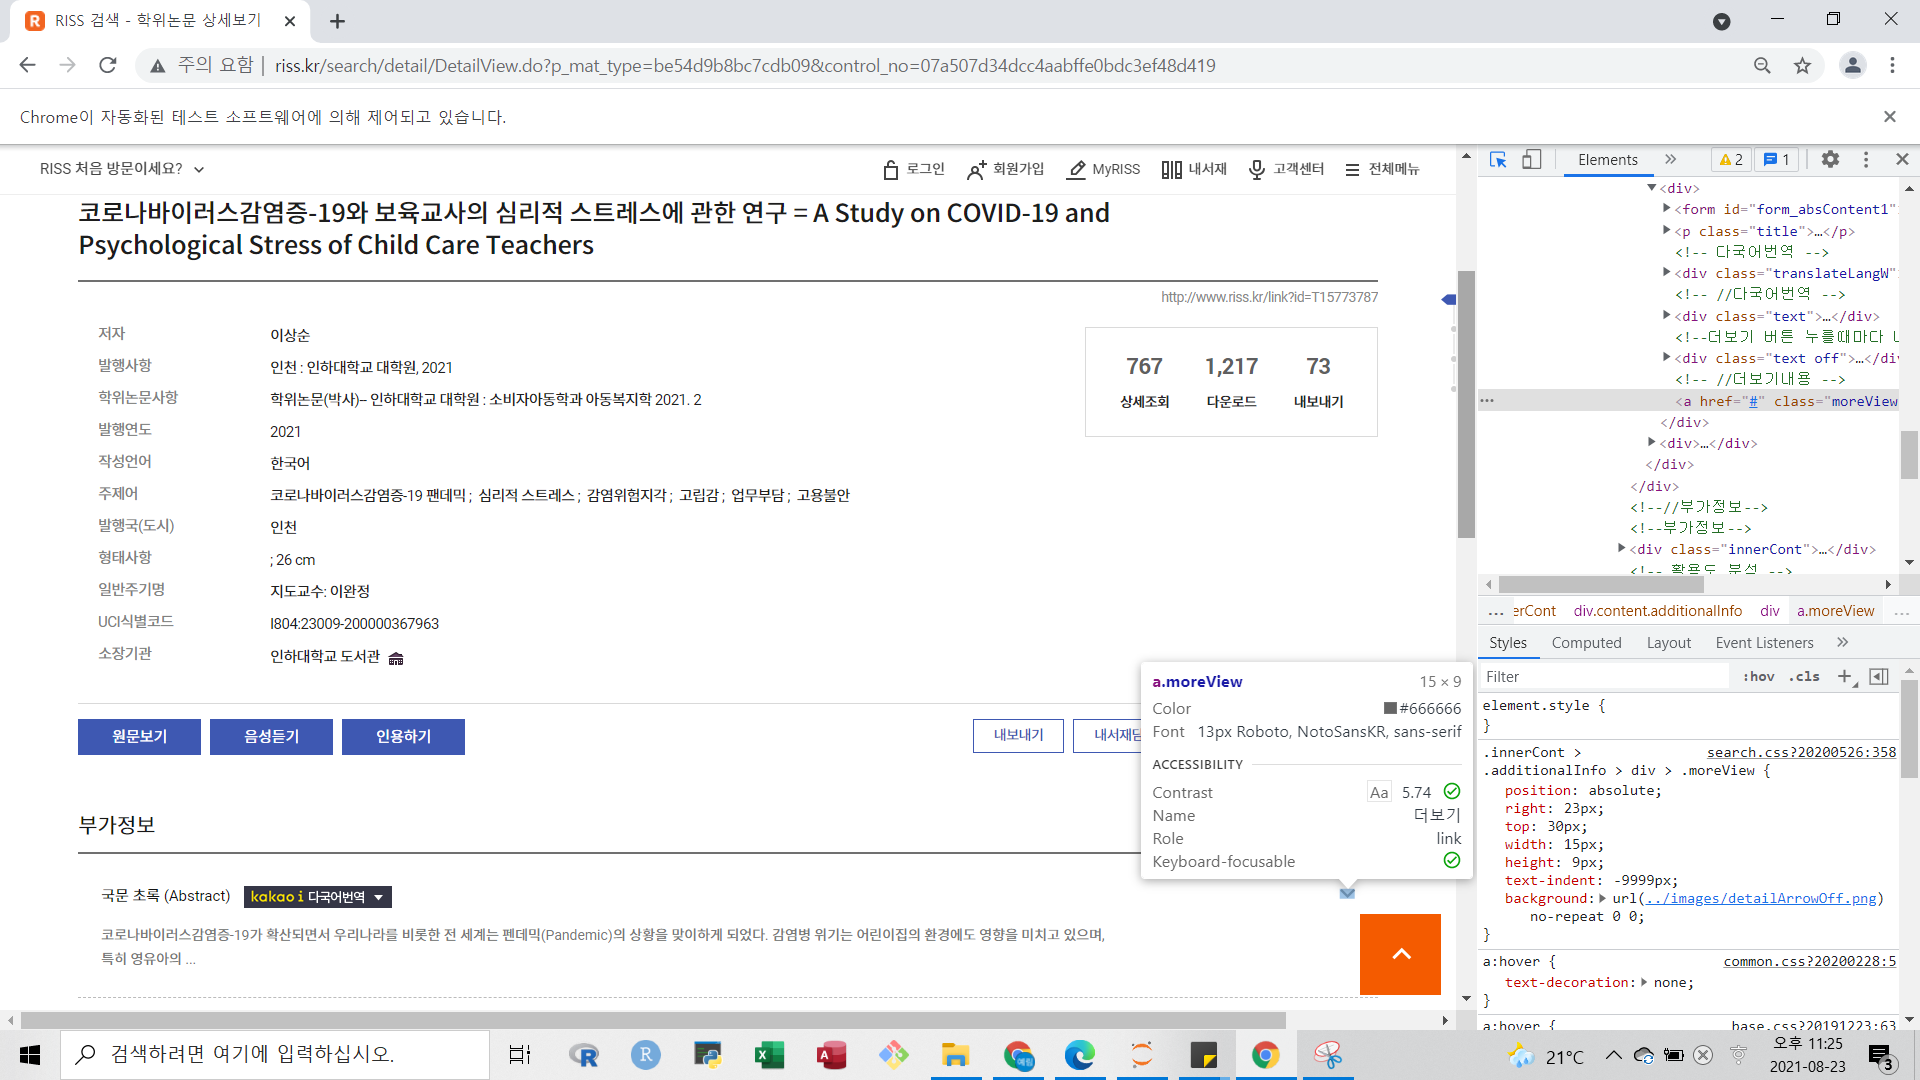
  
부가정보에서 데이터를 수집하기 위해서는 우선 더보기 버튼을 클릭해주어야 한다. 이때, 더보기 버튼의 **클래스명**을 통해 클릭해주자!

In [12]:
# 부가정보 가져오기 - 더보기 버튼 클릭

moreViews = driver.find_elements_by_class_name('moreView')

for moreView in moreViews:
    moreView.send_keys(Keys.ENTER)
    sleep(0.1)

In [13]:
# 부가정보 가져오기 - 첫번째 항목만 가져오기

try:
    first_info = driver.find_element_by_xpath('//*[@id="additionalInfoDiv"]/div/div[1]/div[3]/p').text
    data.append(first_info)
    print(first_info)
except:
    data.append("부가정보가 없습니다.")

코로나바이러스감염증-19가 확산되면서 우리나라를 비롯한 전 세계는 펜데믹(Pandemic)의 상황을 맞이하게 되었다. 감염병 위기는 어린이집의 환경에도 영향을 미치고 있으며, 특히 영유아의 성장 발달과정에서 중요한 역할을 담당하는 보육교사의 심리적인 스트레스에 중요한 원인이 되고 있다.
본 연구는 코로나바이러스감염증-19 팬데믹 전과 후 보육교사의 심리적 스트레스를 살펴보고, 코로나바이러스감염증-19 팬데믹 후 보육교사의 심리적 스트레스에 감염위험지각, 고립감, 업무부담, 고용불안의 영향력을 살펴보고자 하였다. 코로나바이러스감염증-19 팬데믹을 경험하는 보육교사의 심리적 스트레스를 알아보기 위해 경험표집법(ESM)으로 두 차례에 걸쳐 조사를 진행 하였으며, 코로나바이러스감염증-19 팬데믹 선언 전 1차 조사를 기반으로 코로나바이러스감염증-19 팬데믹 선언 후 보육교사의 심리적 스트레스가 어떻게 변화하였는지 알아보고자 단기종단적인 연구방법을 적용하였다. 연구대상은 인천, 경기 소재의 어린이집의 보육교사를 대상으로 영아반, 유아반 보육교사를 편의표집 하였고, 온라인 설문조사와 경험표집법(ESM)으로 자료를 수집하였다. 수집된 자료는 SPSS 21.0 프로그램으로 분석하였으며, 주요 결과는 다음과 같다.
첫째, 코로나바이러스감염증-19 팬데믹 전 보다 후 보육교사의 심리적 스트레스는 높게 나타났고, 오전보다 오후에 일관되게 높게 나타났다. 둘째, 코로나바이러스감염증-19 팬데믹 전과 후 각각 보육교사의 심리적 스트레스는 PWI-SF 점수 분류에 따라 잠재적 스트레스군, 건강군, 고위험군 으로 분류하였고, 비교적 잠재적 스트레스군의 분포가 높은 것을 확인할 수 있었다.
셋째, 코로나바이러스감염증-19 팬데믹 후 측정한 감염위험지각, 고립감, 업무부담, 고용불안 중에서 감염위험지각의 심각성이 가장 높게 나타났고, 고립감이 가장 낮게 나타났다.
넷째, 코로나바이러스감염증-19 팬데믹 후 심리적 스트레스와 감수성, 심각성, 감염위험지각 전체, 업무부담, 직무특성상실, 무력

#### 6-5. 수집한 정보를 바탕으로 DataFrame 만들기

In [14]:
pd.DataFrame(data = {'저자' : data[0], '발행년도' : data[1], '제목' : data[2], '부가정보' : data[3], 'Url' : urls[0]}, index = [0])

,저자,발행년도,제목,부가정보,Url
0,이상순,2021,코로나바이러스감염증-19와 보육교사의 심리적 스트레스에 관한 연구 = A Study...,코로나바이러스감염증-19가 확산되면서 우리나라를 비롯한 전 세계는 펜데믹(Pande...,http://www.riss.kr/search/detail/DetailView.do...


#### 7. 논문 정보 수집 과정 함수화 하기
앞선 예제를 기반으로 함수 속 ???와 공란을 채워주세요

In [15]:
def store(url):
    data = []  #빈 리스트
    author = ""  #저자
    year = ""  #연도
    title = ""  #제목
    first_info = ""  #부가정보
        
    #저자
    author = driver.find_element_by_xpath('//*[@id="thesisInfoDiv"]/div[2]/div[1]/ul/li[1]/div/p/a').text
        
    #연도
    year = driver.find_element_by_xpath('//*[@id="thesisInfoDiv"]/div[2]/div[1]/ul/li[4]/div/p').text
        
    #제목
    title = driver.find_element_by_xpath('//*[@id="thesisInfoDiv"]/div[1]/h3').text
             
    #부가정보    
    moreViews = driver.find_elements_by_class_name('moreView')

    for moreView in moreViews:
        moreView.send_keys(Keys.ENTER)
        sleep(0.1)

    try:
        first_info = driver.find_element_by_xpath('//*[@id="additionalInfoDiv"]/div/div[1]/div[3]/p').text
    except:
        first_info = "부가정보가 없습니다."
        
    data.append(author)
    data.append(year)
    data.append(title)
    data.append(first_info)
    data.append(url)
    paper.append(data)

#### 8. 수집 및 저장
해당 코드는 채점을 위한 코드로 수정하시면 안됩니다!

In [16]:
paper=[]
for url in urls:
    driver.get(url)
    store(url)
    sleep(1)

driver.close()  # 드라이버 닫기

paper_info = pd.DataFrame(paper, columns=['저자', '발행년도', '제목', '부가정보', 'Url'])
paper_info.to_csv('./paper_info.csv', encoding='utf-8')
paper_info

,저자,발행년도,제목,부가정보,Url
0,이상순,2021,코로나바이러스감염증-19와 보육교사의 심리적 스트레스에 관한 연구 = A Study...,코로나바이러스감염증-19가 확산되면서 우리나라를 비롯한 전 세계는 펜데믹(Pande...,http://www.riss.kr/search/detail/DetailView.do...
1,이승윤,2021,코로나-19로 인한 호텔조리종사원의 근무스케줄 변화가 조직몰입에 미치는 영향 : 스...,현재 우리나라뿐만 아니라 전 세계가 코로나-19로 인한 감영병 사태로 인해 경제부문...,http://www.riss.kr/search/detail/DetailView.do...
2,김경주,2020,국가 재난의 위기 속에서 한국교회의 대응 방안에 관한 연구 : 소망교회의 코로나19...,부가정보가 없습니다.,http://www.riss.kr/search/detail/DetailView.do...
3,손희나,2020,코로나19(COVID-19)로 인한 어린이집원장의 어려움과 코로나19에 대한 대응방...,The purpose of this study was to find out the ...,http://www.riss.kr/search/detail/DetailView.do...
4,서신,2021,코로나19 대응정책에서 나타난 차별의 연구 : 이주노동자를 중심으로,이 연구는 한국정부의 이주노동자에 대한 방역대응과 재난지원 정책에 있어 차별적인 요...,http://www.riss.kr/search/detail/DetailView.do...
5,배은정,2021,코로나19 대유행에 따른 유아의 일상생활 변화와 어머니의 코로나19에 대한 걱정이 ...,The present study examined the effects the dai...,http://www.riss.kr/search/detail/DetailView.do...
6,박사랑,2021,코로나바이러스감염증-19(COVID-19)가 공연예술에 미친 영향과 대응 사례에 관...,본 연구는 코로나바이러스감염증-19 발생에 따른 공연예술 분야 피해와 변화를 파악하...,http://www.riss.kr/search/detail/DetailView.do...
7,Liu Jia-Qi,2021,코로나19 시대의 한국관광에 대한 중국인의 행태 고찰 = A Study on the...,As the risk of face-to-face contact with Covid...,http://www.riss.kr/search/detail/DetailView.do...
8,김희숙,2021,코로나 -19 대유행으로 인한 노인 정신건강과 신체활동 실태조사 = The Stud...,본 연구의 목적은 지역사회에 거주하는 65세 이상 노인의 정신건강에 코로나-19 대...,http://www.riss.kr/search/detail/DetailView.do...
9,박지원,2021,코로나19 상황에서의 미디어 이용과 미디어 신뢰가 코로나19 감염 가능성에 대한 낙...,부가정보가 없습니다.,http://www.riss.kr/search/detail/DetailView.do...


#### 9. 다른 페이지의 정보 수집해보기

In [17]:
keyword_2 = '빅데이터'     # 검색용 키워드 : '빅데이터'
paper_2 = []     # 결과 저장용 리스트

In [18]:
# 드라이버 오픈 및 연세대학교 학술정보원 홈페이지로 이동

driver = webdriver.Chrome('C:/Users/dpfla/Downloads/chromedriver_win32/chromedriver.exe')    
driver.get('https://library.yonsei.ac.kr/')

In [19]:
# 검색창 접근 -> 검색용 키워드 입력 -> 검색(Enter)

driver.find_element_by_id('textTotal').send_keys(keyword_2)
driver.find_element_by_id('textTotal').submit()  

In [20]:
# 검색한 화면에서 책/멀티미디어 더보기 버튼 클릭 

driver.find_element_by_xpath('//*[@id="divContent"]/div[1]/div[2]/div[2]/div/div[2]/a').send_keys(Keys.ENTER)

In [21]:
total_2 = int(driver.find_element_by_xpath('//*[@id="divContent"]/div/div[3]/div[2]/div/p/strong[1]').text)     # 전체 책/멀티미디어 수
print(total_2)

580


In [22]:
# 첫 페이지에 존재하는 책/멀티미디어의 url 수집

urls_2 = []

if total_2 < 10:
    # 전체 책/멀티미디어 수가 10개 미만인 경우 - 첫 페이지의 건수 = 전체 건수
    for i in range(1, total_2+1):  
        page = '/html/body/div[2]/div[2]/div/div[2]/div/div[3]/div[2]/form/fieldset/ul/li['+str(i)+']/dl/dd[4]/a'
        url = driver.find_element_by_xpath(page).get_attribute('href')
        urls_2.append(url)
        print(url)
else:
    # 전체 책/멀티미디어 수가 10개 이상인 경우 - 첫 페이지의 건수 = 10개
    for i in range(1, 11):
        page = '/html/body/div[2]/div[2]/div/div[2]/div/div[3]/div[2]/form/fieldset/ul/li['+str(i)+']/dl/dd[4]/a'
        url = driver.find_element_by_xpath(page).get_attribute('href')
        urls_2.append(url)
        print(url)

https://library.yonsei.ac.kr/search/detail/CATTOT000001937603?mainLink=/search/tot&briefLink=/search/tot/result?commandType=advanced_A_lmtsn=000000000001_A_lmtsn=000000000003_A_lmtsn=000000000006_A_inc=TOTAL_A_q=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_A_lmtst=OR_A_lmtst=OR_A_lmtst=OR_A_lmt0=TOTAL_A_lmt2=YNLIB%3BGSISL%3BMUSEL%3BOTHER%3BUGSTL%3BYSLIB%3BARCHL%3BBUSIL%3BKORCL%3BIOKSL%3BLAWSL%3BMULTL%3BMATHL%3BMUSIC%3BUML_A_lmt1=TOTAL_A_st=KWRD_A_si=TOTAL
https://library.yonsei.ac.kr/search/detail/CATTOT000002035468?mainLink=/search/tot&briefLink=/search/tot/result?commandType=advanced_A_lmtsn=000000000001_A_lmtsn=000000000003_A_lmtsn=000000000006_A_inc=TOTAL_A_q=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_A_lmtst=OR_A_lmtst=OR_A_lmtst=OR_A_lmt0=TOTAL_A_lmt2=YNLIB%3BGSISL%3BMUSEL%3BOTHER%3BUGSTL%3BYSLIB%3BARCHL%3BBUSIL%3BKORCL%3BIOKSL%3BLAWSL%3BMULTL%3BMATHL%3BMUSIC%3BUML_A_lmt1=TOTAL_A_st=KWRD_A_si=TOTAL
https://library.yonsei.ac.kr/search/detail/CATTOT000000868411?mainLink=/search/tot&briefLink=/se

In [23]:
data_2 = []     # 수집한 정보를 저장할 리스트

# 첫번째 링크로 이동
driver.get(urls_2[0])     

In [24]:
# (1) 유형 구하기

category = driver.find_element_by_xpath('//*[@id="moreInfo"]/tbody/tr[1]/td').text
data_2.append(category)
print(category)

단행본


In [25]:
# (2) 저자 구하기

author = driver.find_element_by_xpath('//*[@id="moreInfo"]/tbody/tr[3]/td/a').text
data_2.append(author)
print(author)

이지은


In [26]:
# (3) 자료명 구하기

name = driver.find_element_by_xpath('//*[@id="divContent"]/div/div[2]/div[1]/h3').text
data_2.append(name)
print(name)

블록데이터 혁명 : 빅데이터·AI·블록체인, 제4차 산업혁명시대의 본질을 관통하는 전략과 솔루션


In [27]:
# (4) 발행사항 구하기

info = driver.find_element_by_xpath('//*[@id="moreInfo"]/tbody/tr[5]/td').text
data_2.append(info)
print(info)

서울 : Angle books, 2018


In [28]:
# 첫번째 링크에서 수집한 정보를 바탕으로 DataFrame 생성

pd.DataFrame(data = {'유형' : data_2[0], '저자' : data_2[1], '자료명' : data_2[2],
                     '발행사항' : data_2[3], 'Url' : urls_2[0]}, index = [0])

,유형,저자,자료명,발행사항,Url
0,단행본,이지은,"블록데이터 혁명 : 빅데이터·AI·블록체인, 제4차 산업혁명시대의 본질을 관통하는 ...","서울 : Angle books, 2018",https://library.yonsei.ac.kr/search/detail/CAT...


In [29]:
# 함수화

def store_2(url):
    data = []     # 빈 리스트
        
    # 유형
    category = driver.find_element_by_xpath('//*[@id="moreInfo"]/tbody/tr[1]/td').text
        
    # 저자
    author = driver.find_element_by_xpath('//*[@id="moreInfo"]/tbody/tr[3]/td/a').text
        
    # 자료명
    name = driver.find_element_by_xpath('//*[@id="divContent"]/div/div[2]/div[1]/h3').text
             
    # 발행사항
    info = driver.find_element_by_xpath('//*[@id="moreInfo"]/tbody/tr[5]/td').text
        
    data.append(category)
    data.append(author)
    data.append(name)
    data.append(info)
    data.append(url)
    paper.append(data)

In [30]:
# 수집 및 저장

paper = []

for url in urls_2:
    driver.get(url)
    store_2(url)
    sleep(1)

driver.close()    # 드라이버 닫기

paper_info = pd.DataFrame(paper, columns = ['유형', '저자', '자료명', '발행사항', 'Url'])
paper_info

,유형,저자,자료명,발행사항,Url
0,단행본,이지은,"블록데이터 혁명 : 빅데이터·AI·블록체인, 제4차 산업혁명시대의 본질을 관통하는 ...","서울 : Angle books, 2018",https://library.yonsei.ac.kr/search/detail/CAT...
1,단행본,나홍석,(이기적) 빅데이터분석기사 필기,"서울 : 영진닷컴, 2020",https://library.yonsei.ac.kr/search/detail/CAT...
2,단행본,김성준,"빅데이터, 인재를 말하다",297 p. : 삽화 ; 23 cm,https://library.yonsei.ac.kr/search/detail/CAT...
3,단행본,한국소프트웨어기술인협회. 빅데이터전략연구소,빅데이터 개론 : analyse data,318 p. : 삽화 ; 27 cm,https://library.yonsei.ac.kr/search/detail/CAT...
4,단행본,한국소프트웨어기술인협회. 빅데이터전략연구소,빅데이터 개론 : analyse data,"파주 : 光文閣, 2021",https://library.yonsei.ac.kr/search/detail/CAT...
5,단행본,한국디지털정책학회. 빅데이터전략연구회,(NCS 기반) 경영 빅데이터 분석,332 p. : 삽화 ; 26 cm,https://library.yonsei.ac.kr/search/detail/CAT...
6,단행본,최은수,"(빅데이터 비밀열쇠) Unlock 혁명 : 데이터·AI, 세상을 바꾸다","서울 : 매일경제신문사, 2019",https://library.yonsei.ac.kr/search/detail/CAT...
7,단행본,"Paharia, Rajat",빅데이터 게임화 전략과 만나다,294 p. : 삽화 ; 23 cm,https://library.yonsei.ac.kr/search/detail/CAT...
8,단행본,BC카드. 빅데이터센터,"빅데이터, 사람을 읽다 : 소비로 보는 사람, 시간 그리고 공간",312 p. : 천연색삽화 ; 23 cm,https://library.yonsei.ac.kr/search/detail/CAT...
9,단행본,황승구,빅데이터 플랫폼 전략 : 빅데이터가 바꾸는 미래 비즈니스 플랫폼 혁명,247 p. : 천연색삽화 ; 23 cm,https://library.yonsei.ac.kr/search/detail/CAT...
